In [1]:
import csv
import cv2
import numpy as np
## loading the first set of training data
lines = []
with open('/home/carnd/CarND-LeNet-Lab/CarND-Behavioral-cloning-P3/data5/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
        
images = []
measurements = []
for line in lines:
    for i in range(3):
        source_path = line[i]
        filename = source_path.split('/')[-1]
        current_path = '/home/carnd/CarND-LeNet-Lab/CarND-Behavioral-cloning-P3/data5/IMG/'+filename
        image = cv2.imread(current_path)
        images.append(image)
        measurement = float(line[3])
        measurements.append(measurement)
    

In [2]:
## loading the second set of training data and adding it on top of the first 
lines = []
with open('/home/carnd/CarND-LeNet-Lab/CarND-Behavioral-cloning-P3/data3/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
for line in lines:
    for i in range(3):
        source_path = line[i]
        filename = source_path.split('/')[-1]
        current_path = '/home/carnd/CarND-LeNet-Lab/CarND-Behavioral-cloning-P3/data3/IMG/'+filename
        image = cv2.imread(current_path)
        images.append(image)
        measurement = float(line[3])
        measurements.append(measurement)

In [3]:
## loading the third set of training data and adding it to first and second 
lines = []
with open('/home/carnd/CarND-LeNet-Lab/CarND-Behavioral-cloning-P3/data4/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
        
for line in lines:
    for i in range(3):
        source_path = line[i]
        filename = source_path.split('/')[-1]
        current_path = '/home/carnd/CarND-LeNet-Lab/CarND-Behavioral-cloning-P3/data4/IMG/'+filename
        image = cv2.imread(current_path)
        images.append(image)
        measurement = float(line[3])
        measurements.append(measurement)

In [4]:
## loading the fourth set of training data and adding it to first and second 
lines = []
with open('/home/carnd/CarND-LeNet-Lab/CarND-Behavioral-cloning-P3/data2/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
        
for line in lines:
    for i in range(3):
        source_path = line[i]
        filename = source_path.split('/')[-1]
        current_path = '/home/carnd/CarND-LeNet-Lab/CarND-Behavioral-cloning-P3/data2/IMG/'+filename
        image = cv2.imread(current_path)
        images.append(image)
        measurement = float(line[3])
        measurements.append(measurement)

In [4]:
## augmenting all the training data
augmented_images, augmented_measurements = [],[]
for image,measurement in zip(images, measurements):
    augmented_images.append(image)
    augmented_measurements.append(measurement)
    augmented_images.append(cv2.flip(image,1))
    augmented_measurements.append(measurements*(-1))

Train on 21751 samples, validate on 5438 samples
Epoch 1/3
21751/21751 [==============================] - 49s - loss: 0.0435 - val_loss: 0.1826
Epoch 2/3
21751/21751 [==============================] - 48s - loss: 0.0337 - val_loss: 0.1451
Epoch 3/3
21751/21751 [==============================] - 48s - loss: 0.0328 - val_loss: 0.1472
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_5 (Lambda)                (None, 160, 320, 3)   0           lambda_input_5[0][0]             
____________________________________________________________________________________________________
cropping2d_5 (Cropping2D)        (None, 65, 320, 3)    0           lambda_5[0][0]                   
____________________________________________________________________________________________________
convolution2d_21 (Convolution2D) (None, 31, 158, 28)   2128 

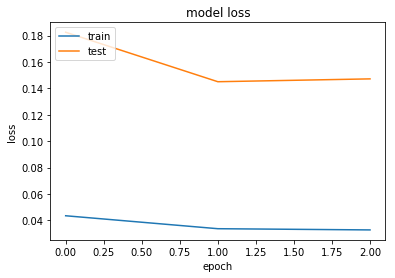

In [14]:
X_train = np.array(images)
y_train = np.array(measurements)
## building the convolutional network and training it
from keras.models import Sequential
from keras.layers import Flatten,Dense,Lambda,Cropping2D
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.layers import Dropout

model = Sequential()
model.add(Lambda(lambda x: x/255-0.5,input_shape=(160,320,3)))
model.add(Cropping2D(cropping=((70,25),(0,0))))
model.add(Convolution2D(28, 5, 5,subsample=(2,2),activation="relu"))
model.add(Convolution2D(36, 5, 5,subsample=(2,2),activation="relu"))
model.add(Convolution2D(48, 5, 5,subsample=(2,2),activation="relu"))
model.add(Convolution2D(64, 3, 3,activation="relu"))
model.add(Convolution2D(74, 3, 3,activation="relu"))
model.add(Flatten())
model.add(Dense(200))
model.add(Dropout(0.2))
model.add(Dense(150))
model.add(Dropout(0.2))
model.add(Dense(50))
model.add(Dropout(0.2))
model.add(Dense(50))
model.add(Dense(1))


model.compile(loss='mse', optimizer='adam')
history = model.fit(X_train, y_train, validation_split=0.2, shuffle=True,nb_epoch=3)

model.save('model1.h5')
model.summary()

# list all data in history
print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()